# Ensemble Classification Project
## David Santiago Buitrago Prada
### 24/09/2025

# Objective

This project goal is to model the income classification for two categories { >= 50k or < 50k} based on census data. Dataset is consulted from UC Irvine Machine Learning repository: https://archive.ics.uci.edu/


In [ ]:
pip install ucimlrepo

# Data Loading

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [ ]:
X = pd.DataFrame(X)
X = X.drop('fnlwgt', axis=1)
y = pd.DataFrame(y)

In [ ]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


## Target Labeling

In [ ]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [ ]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


In [ ]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
y['income'] = y['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [ ]:
y.groupby('income').size()/len(y)

,0
income,
0,0.760718
1,0.239282


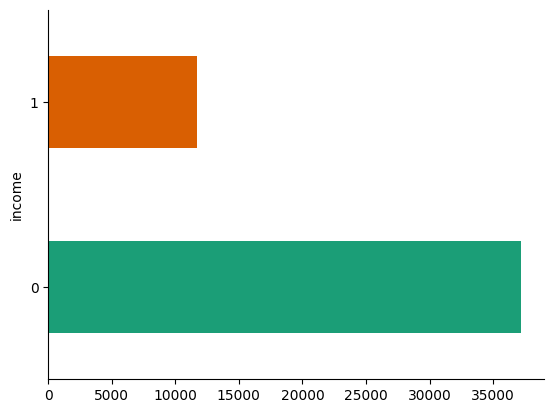

In [ ]:
# @title income

from matplotlib import pyplot as plt
import seaborn as sns
y.groupby('income').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

There's evidence of a notorious imbalance in the target which might affect the predictions, it will be necessary to consider weighted classes for the models.

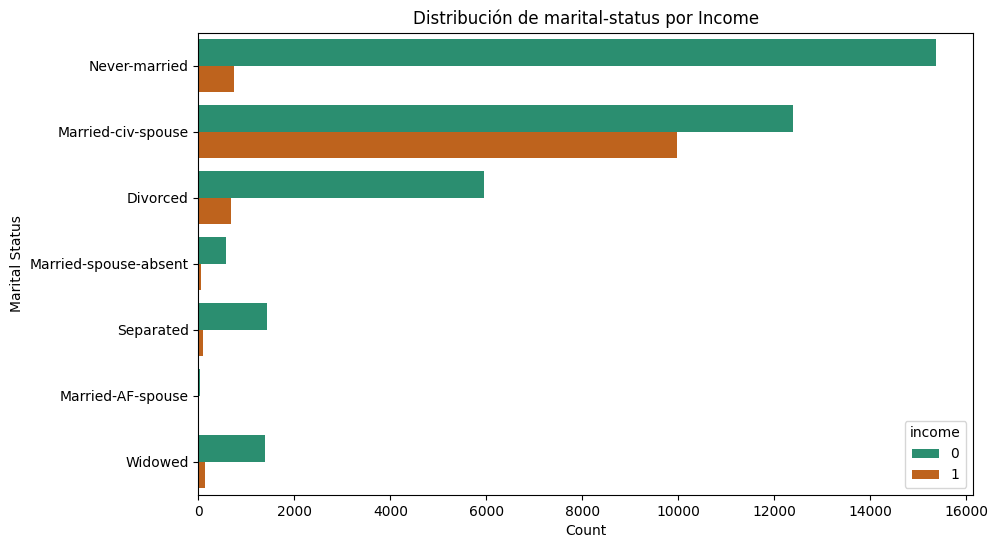

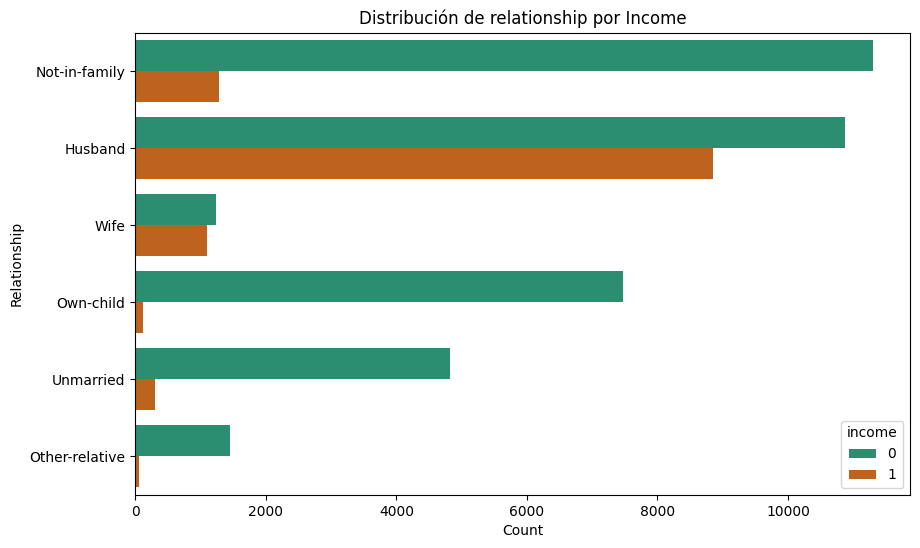

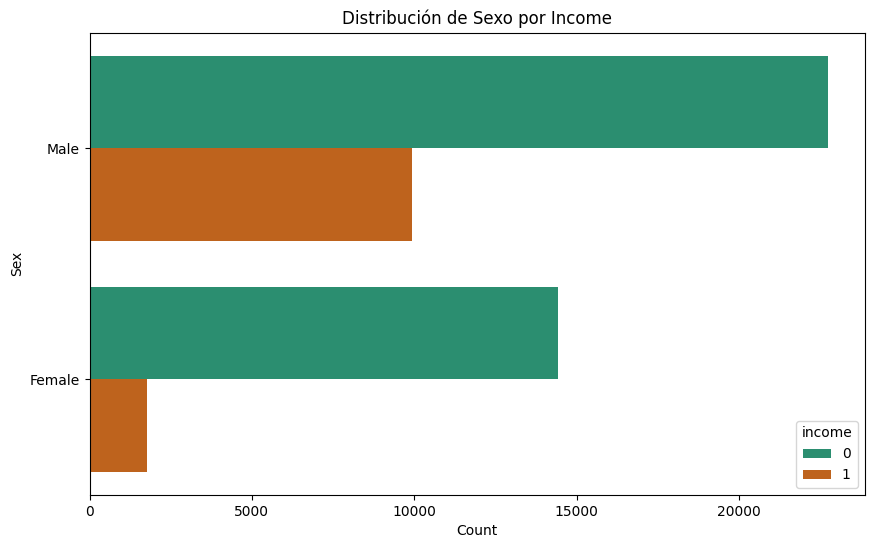

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the target variable to X for plotting
X_plot = X.copy()
X_plot['income'] = y

# Plot marital-status separated by income
plt.figure(figsize=(10, 6))
sns.countplot(data=X_plot, y='marital-status', hue='income', palette='Dark2')
plt.title('Distribución de marital-status por Income')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()

# Plot relationship separated by income
plt.figure(figsize=(10, 6))
sns.countplot(data=X_plot, y='relationship', hue='income', palette='Dark2')
plt.title('Distribución de relationship por Income')
plt.xlabel('Count')
plt.ylabel('Relationship')
plt.show()

# Plot sex separated by income
plt.figure(figsize=(10, 6))
sns.countplot(data=X_plot, y='sex', hue='income', palette='Dark2')
plt.title('Distribución de Sexo por Income')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()

In [ ]:
X.groupby('sex').size()/len(X)

,0
sex,
Female,0.331518
Male,0.668482


In [ ]:
df = pd.concat([X, pd.DataFrame(y, columns=['income'])], axis=1)
sex = df.groupby('sex')['income'].value_counts() / df.groupby('sex')['income'].count()
print(sex)

sex     income
Female  0         0.890749
        1         0.109251
Male    0         0.696233
        1         0.303767
dtype: float64


The imbalance between target incomes is consistent across categories. It is also worth to notice that approximately 67% of the sample are men, which explains why there are more men earning over 50k compared to women. However, only 10% of women in the sample earn more than 50k, while 30% of men fall into the same income range, suggesting the presence of a gender gap.

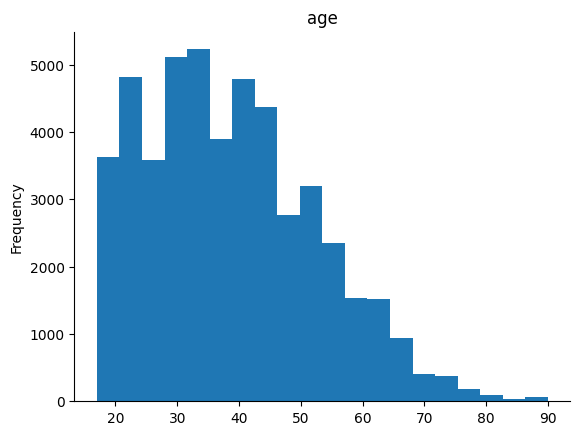

In [ ]:
# @title age

from matplotlib import pyplot as plt
X['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

The age histogram shows an approximately normal distribution of the sample  taking into account adults from 20-90 years old.

In [ ]:
X.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Categorical Encoding

In [ ]:
X_dummies = pd.get_dummies(X, drop_first=True)
y = y.values.ravel()
X_dummies.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Model Construction

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, auc, roc_curve

model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8077592384072064
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7414
           1       0.59      0.66      0.62      2355

    accuracy                           0.81      9769
   macro avg       0.74      0.76      0.75      9769
weighted avg       0.82      0.81      0.81      9769



## Fine-Tuning Max-Depth

In [ ]:
depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [ ]:
from sklearn.metrics import roc_auc_score

auc_scores = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score_depth = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc_score_depth)

auc_scores

[np.float64(0.8248083186855418),
 np.float64(0.8699586826323298),
 np.float64(0.8941039990332171),
 np.float64(0.9015290404279046),
 np.float64(0.9002010885471166),
 np.float64(0.8921556566248395),
 np.float64(0.8808916051974889),
 np.float64(0.8624581829178402),
 np.float64(0.848353605418566),
 np.float64(0.8355188468250518)]

In [ ]:
performance_df = pd.DataFrame()
performance_df['Depth'] = depths
performance_df['AUC'] = auc_scores

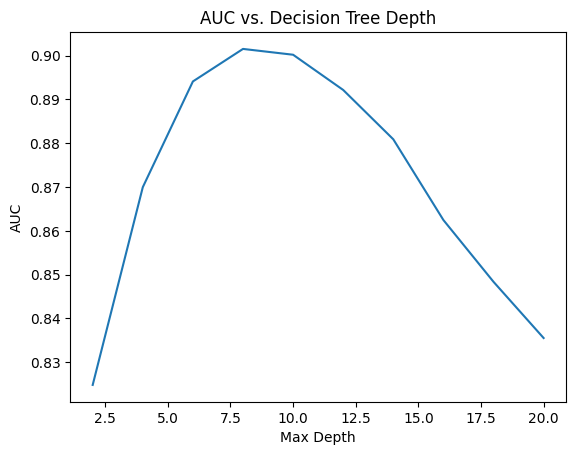

In [ ]:
import matplotlib.pyplot as plt

plt.plot(performance_df['Depth'], performance_df['AUC'])
plt.title('AUC vs. Decision Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.show()

 The AUC scores for the Decision Tree model varied with the `max_depth`, anging from approximately 0.80 at a depth of 2 to peaking around 0.91 at a depth of 10, and then slightly decreasing for greater depths.


# Enssenmble Methods

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, auc

rf_depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

rf_auc_scores = []
for depth in rf_depths:
    model = RandomForestClassifier(max_depth=depth, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    current_auc = roc_auc_score(y_test, y_pred_proba)
    rf_auc_scores.append(current_auc)

In [ ]:
rf_performance_df = pd.DataFrame()
rf_performance_df['Depth'] = rf_depths
rf_performance_df['AUC'] = rf_auc_scores
display(rf_performance_df)

,Depth,AUC
0,2,0.876927
1,4,0.891060
2,6,0.898346
3,8,0.903298
4,10,0.907219
5,12,0.907999
6,14,0.910364
7,16,0.911984
8,18,0.911537
9,20,0.911039


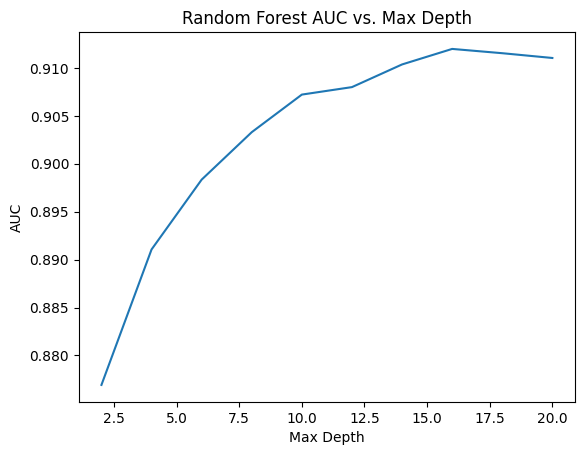

In [ ]:
plt.plot(rf_performance_df['Depth'], rf_performance_df['AUC'])
plt.title('Random Forest AUC vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

model = RandomForestClassifier(class_weight= 'balanced', random_state=42, max_depth=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7984440577336472
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      7414
           1       0.55      0.87      0.68      2355

    accuracy                           0.80      9769
   macro avg       0.75      0.82      0.76      9769
weighted avg       0.85      0.80      0.81      9769



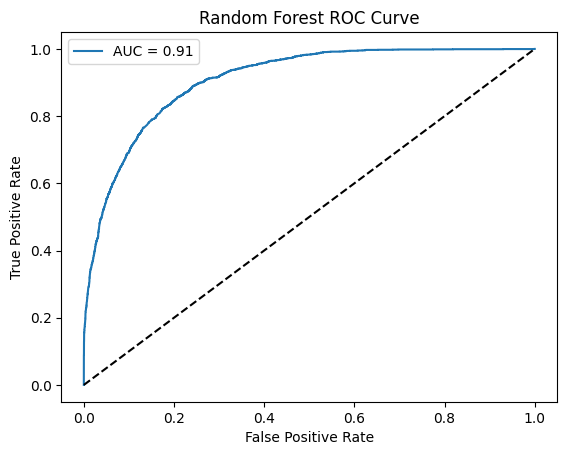

In [ ]:
# Probabilidades para la clase positiva (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_rf = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f'AUC = {auc_score_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

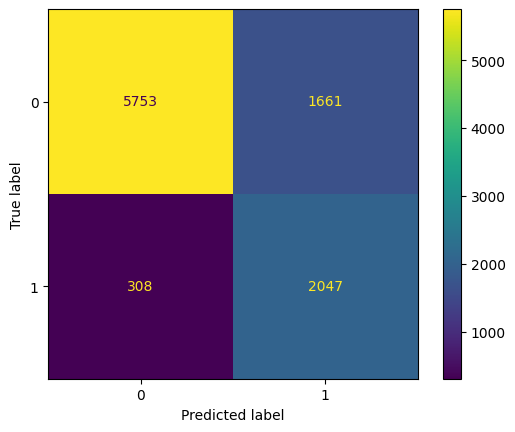

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# XGBoost

XGBoost Model Performance:
Accuracy: 0.8287439860784113
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7414
           1       0.60      0.86      0.71      2355

    accuracy                           0.83      9769
   macro avg       0.77      0.84      0.79      9769
weighted avg       0.86      0.83      0.84      9769



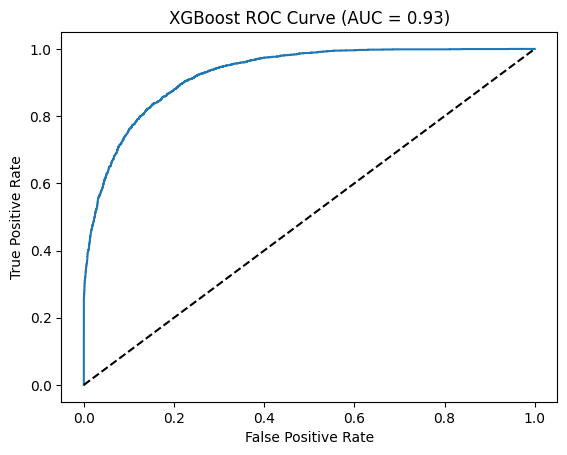

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the XGBoost model with class weighting
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=(len(y_train[y_train == 0])/len(y_train[y_train == 1])))
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Calculate and plot ROC curve and AUC
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_xgb = roc_curve(y_test, y_pred_proba_xgb)
auc_score_xgb = auc(roc_xgb[0], roc_xgb[1])

plt.plot(roc_xgb[0], roc_xgb[1])
plt.title(f'XGBoost ROC Curve (AUC = {auc_score_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

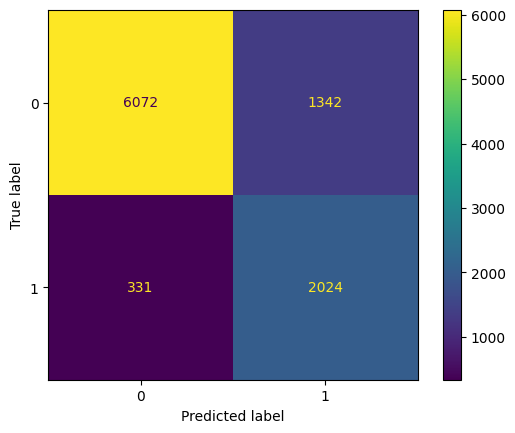

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)

Better metrics in average for both classes and higher AUC makes XGBoost the champion model.

In [ ]:
# Get feature importances from the trained XGBoost model
feature_importances = xgb_model.get_booster().get_score(importance_type='weight')

# Convert the dictionary to a pandas Series for easier sorting
feature_importances_series = pd.Series(feature_importances)

# Sort the feature importances in descending order and get the top 15
top_15_features = feature_importances_series.sort_values(ascending=False).head(15)

# Display the top 15 feature names and their importance scores
print("Top 15 most important features:")
print(top_15_features)

Top 15 most important features:
age                                  667.0
hours-per-week                       384.0
capital-gain                         294.0
education-num                        244.0
capital-loss                         192.0
marital-status_Married-civ-spouse     76.0
workclass_Private                     68.0
workclass_Self-emp-not-inc            58.0
sex_Male                              55.0
occupation_Prof-specialty             43.0
relationship_Wife                     34.0
occupation_Exec-managerial            33.0
relationship_Unmarried                32.0
marital-status_Never-married          31.0
education_HS-grad                     31.0
dtype: float64


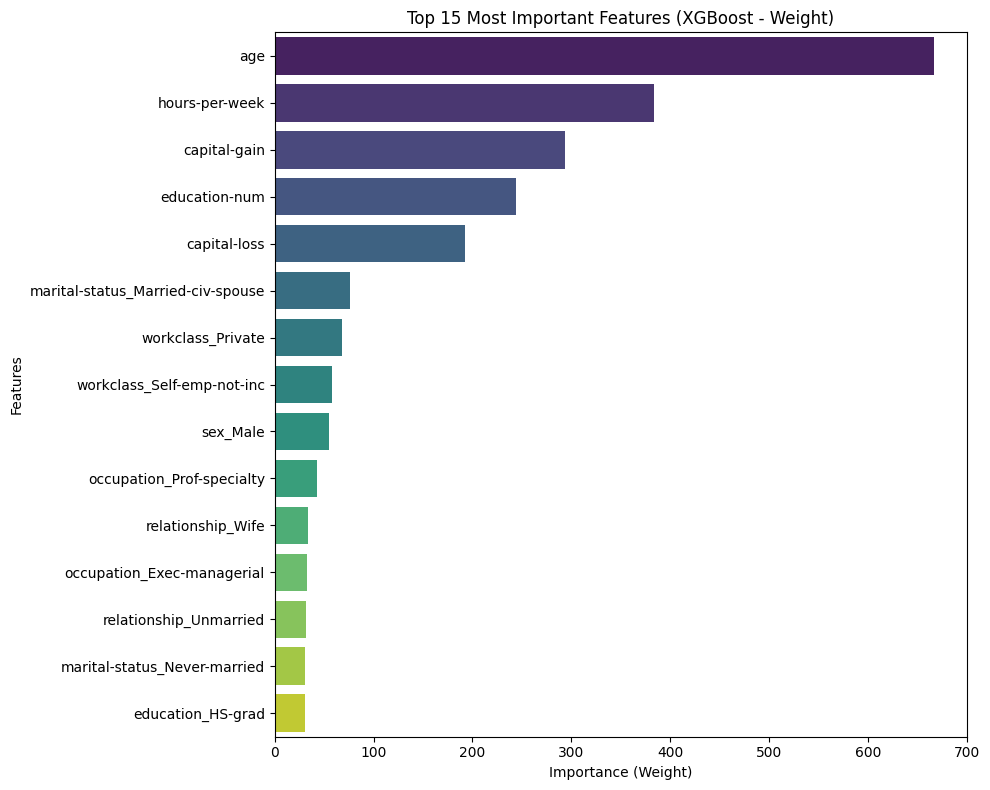

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 15 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=top_15_features.values, y=top_15_features.index, palette='viridis', hue=top_15_features.index, legend=False) # Updated for FutureWarning
plt.title('Top 15 Most Important Features (XGBoost - Weight)')
plt.xlabel('Importance (Weight)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

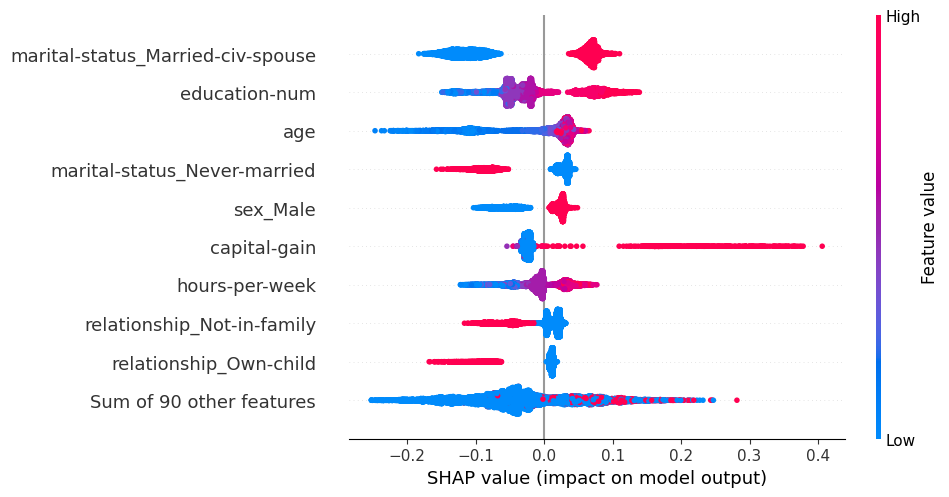

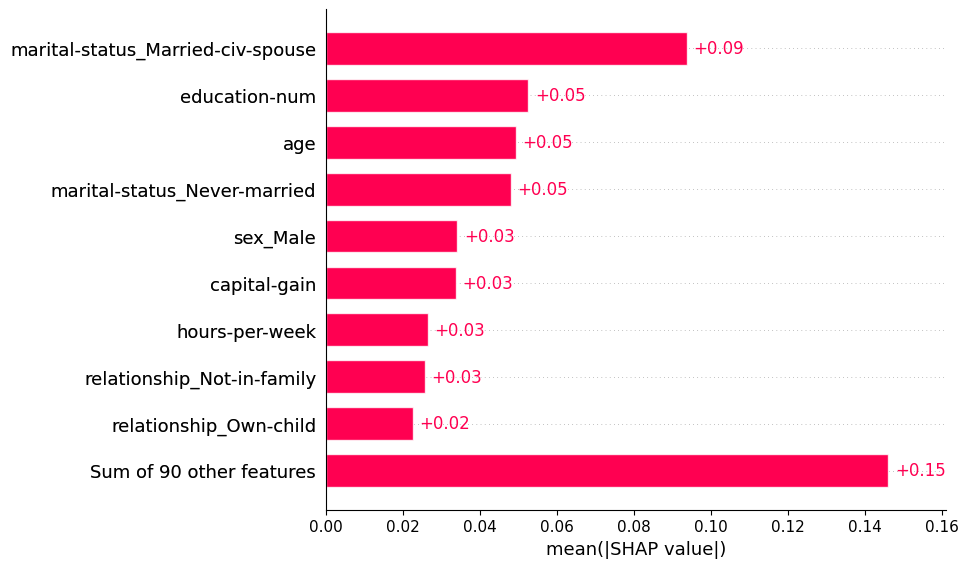

In [ ]:
import shap

shap.initjs()

# Crear explainer
explainer = shap.TreeExplainer(model)

# Calcular valores SHAP
shap_values = explainer(X_test)  # Explanation con múltiples salidas si es clasificación multiclase

# Si es binario/multiclase, elegir la salida que quieres analizar (ejemplo: clase 1)
shap_class1 = shap_values[:, :, 1]  # índice de la clase positiva

# Gráfico global (beeswarm: positivos/negativos)
shap.plots.beeswarm(shap_class1)

# Gráfico de importancia promedio (bar plot)
shap.plots.bar(shap_class1)

# Ejemplo local: explicando una sola predicción (para la clase 1)
shap.plots.force(shap_class1[0])


# Conclusions

# 1. Classification Report

Class 0

Precision:  0.94 → when the model predicts 0 it does with a 94% confidence. More registers in this class favorate a high precision, also, as it was trained with balanced weights between classes, the 'threshold' is lower, then the 0 predictions are well separated from the others increasing precision.

Recall: 0.83 → From the total of true negatives, 83% were predicted accurately. Becuse of the inbalance in the training. False negatives are less penalized, in trade of accuracy, in the true positives.


Class 1

Precisión: 0.61 → when 1 is predicted, only the 61% are true positives, once again the imbalance in the classes impacts negatively the model capacity to separate with confidence.

Recall: 0.85 → Without considering a weigthed balance this metric would have been much lower. Depending on the bussines context, the threshold classification should be adjusted. For this data it is interesting to determine which fetures impact the most to earn high salaries. Then a high recall is prefered.

# 2. ROC curve and AUC



ROC curve grows fast, also, the area under the curve close to 1 this indicates strong discriminative ability for diferent thresholds.

# 3. Features selection and importances analysis


* age

The strongest predictor in the model. Age often correlates with work experience and seniority, which directly influence income.

* hours-per-week

Very relevant: more working hours generally increase the likelihood of higher income, although the effect is not strictly linear (low-wage workers can work long hours without surpassing the 50k threshold).

* capital-gain

Strong predictor. Individuals reporting capital gains are much more likely to earn >50k.

* education-num (years of education)

Directly captures educational attainment. Higher education levels strongly correlate with higher income.

# SHAP Analysis

## 1. SHAP Summary Plot (Beeswarm)

**Interpretation of color & direction**:  
- Red means high feature value, blue means low feature value.

**Top Features**:  
- `marital-status_Married-civ-spouse`, `education-num`, and `age` stand out as the most impactful variables.  
- High education level and being married strongly increase the probability of income ≥ 50K.  
- On the other hand, being never married generally decreases the likelihood given the blue dots pushing left.  
- Younger individuals contribute negatively, while older individuals push positively.  

**Overall trend**:  
Marital status, education, and age dominate the model’s decision-making, with `capital-gain` being a strong differentiator when non-zero.

---

## 2. Feature Importance Bar Chart (mean absolute SHAP values)

**Relative importance**:  
- The largest single driver is `marital-status_Married-civ-spouse` (mean SHAP ~0.09).  
- Education and age follow with ~0.05 each.  
- Other significant but smaller contributors: `sex_Male`, `capital-gain`, `hours-per-week`, and family-related relationship variables.  
- Interestingly, the "Sum of 90 other features" collectively contributes ~0.15, meaning there are many small but non-negligible effects across the dataset.  

**Interpretation**:  
While a few core socio-economic and demographic variables dominate, the tail of minor features combined also influences the classifier.

---

## 3. Individual Force Plot (Single Prediction Explanation)

**Prediction**:  
For this specific individual, the model output is **0.03** (low probability of income ≥ 50K), below the base value of 0.5.

**Key negative contributors (pushing prediction down)**:  
- `sex_Male = 1` (male, but here it reduces probability due to interactions with other features)  
- `age = 18` (very young, strong negative effect)  
- `marital-status_Never-married = 1`  
- `hours-per-week = 20` (low work hours)  

**Key positive contributors (pushing up slightly but insufficient to change outcome)**:  
- `education_HS-grad = 1` and `education-num = 9` add some value but not enough.  
- However, lack of `capital-gain` and being in `occupation_Other-service` weigh negatively.  

**Interpretation**:  
The model clearly classifies this individual as low-income because youth, lack of marriage, low work hours, and no capital gains outweigh the modest effect of finishing high school.
